In this notebook, We are Quantizing our fine tuned model Gemma model using llama.cpp tool.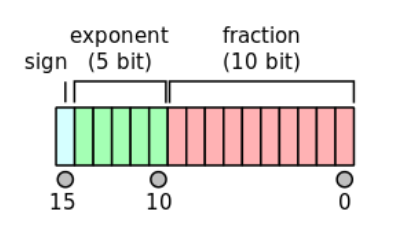

At, First you need to check wheather your model is supported or not
check here https://github.com/ggerganov/llama.cpp

# 1. At, first you need to clone this llama.cpp from github and install necessary requirements

In [1]:
import os
!git clone https://github.com/ggerganov/llama.cpp

fatal: destination path 'llama.cpp' already exists and is not an empty directory.


# 2. Navigating to that specific folder llama.cpp and using Gpu either it's free colab or cuda and installing all my requirements from.txt file

In [2]:
!cd llama.cpp && LLAMA_CUBLAS=1 make && pip install -r requirements.txt

I ccache not found. Consider installing it for faster compilation.
I llama.cpp build info: 
I UNAME_S:   Linux
I UNAME_P:   x86_64
I UNAME_M:   x86_64
I CFLAGS:    -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG -DGGML_USE_CUBLAS -I/usr/local/cuda/include -I/usr/local/cuda/targets/x86_64-linux/include  -std=c11   -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wshadow -Wstrict-prototypes -Wpointer-arith -Wmissing-prototypes -Werror=implicit-int -Werror=implicit-function-declaration -pthread -march=native -mtune=native -Wdouble-promotion 
I CXXFLAGS:  -std=c++11 -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wmissing-declarations -Wmissing-noreturn -pthread  -march=native -mtune=native -Wno-array-bounds -Wno-format-truncation -Wextra-semi -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG -DGGML_USE_CUBLAS -I/usr/local/cuda/include -I/usr/local/cuda/targets/x86_64-linux/include 
I NVCCFLAGS: -std=c++11 -O3 -use_fast_math --forward-

# 3. We are Downloading out model from huggingface using snapshot download

In [3]:
from huggingface_hub import snapshot_download

model_name = "Jevvan123/Gemma_finetuned_model"
base_model = "./original_model/"
snapshot_download(repo_id=model_name, local_dir=base_model, local_dir_use_symlinks=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/522 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

'/content/original_model'

In [4]:
quantized_path = "./quantized_model/"
original_model = quantized_path+'/FP16.gguf'
methods = ["q4_k_m"]
base_model = "./original_model/"

In [5]:
!mkdir ./quantized_model/

mkdir: cannot create directory ‘./quantized_model/’: File exists


In [6]:
# !rm -r /content/original_model

# 4. initially, we are making the model compatible with llama.cpp by converting it to a format called "gguf." and We are using F-16 (half-precision floating point) for this task using lower bit like 8-bit or 4-bit can decrease performance of the model


In [7]:
!python llama.cpp/convert-hf-to-gguf.py ./original_model/ --outtype f16 --outfile ./quantized_model/FP16.gguf

Loading model: original_model
gguf: This GGUF file is for Little Endian only
Set model parameters
Set model tokenizer
gguf: Setting special token type bos to 2
gguf: Setting special token type eos to 1
gguf: Setting special token type unk to 3
gguf: Setting special token type pad to 1
gguf: Setting add_bos_token to True
gguf: Setting add_eos_token to False
gguf: Setting chat_template to {{ bos_token }}{% if messages[0]['role'] == 'system' %}{{ raise_exception('System role not supported') }}{% endif %}{% for message in messages %}{% if (message['role'] == 'user') != (loop.index0 % 2 == 0) %}{{ raise_exception('Conversation roles must alternate user/assistant/user/assistant/...') }}{% endif %}{% if (message['role'] == 'assistant') %}{% set role = 'model' %}{% else %}{% set role = message['role'] %}{% endif %}{{ '<start_of_turn>' + role + '
' + message['content'] | trim + '<end_of_turn>
' }}{% endfor %}{% if add_generation_prompt %}{{'<start_of_turn>model
'}}{% endif %}
Exporting model to

# 5. we are using q4-km quantization methods it loads into 4-bit precison you can visit this blog for more details https://towardsdatascience.com/quantize-llama-models-with-ggml-and-llama-cpp-3612dfbcc172

In [8]:
for m in methods:
    qtype = f"{quantized_path}/{m.upper()}.gguf"
    os.system("./llama.cpp/quantize "+quantized_path+"/FP16.gguf "+qtype+" "+m)

# 5. Getting hugging face Token

In [9]:
from huggingface_hub import notebook_login
notebook_login()

# **6. Uploading GGUf model into huggingface**



In [10]:
from huggingface_hub import HfApi, HfFolder, create_repo, upload_file

model_path = "/content/quantized_model/FP16.gguf"
try:
  repo_name = "gemma-2b-it-GGUF-quantized_model"
  repo_url = create_repo(repo_name, private=False)
except:
  print('The repo already Exists')


api = HfApi()
api.upload_file(
    path_or_fileobj=model_path,
    path_in_repo="Q4_K_M.gguf", # set model name for hugging face
    repo_id="Jevvan123/Gemma_Quantize_into_GGUF-File", #change repo name
    repo_type="model",
)

FP16.gguf:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Jevvan123/Gemma_Quantize_into_GGUF-File/commit/f12f687e0d14e8fbc7dfec76dc508157a3f68356', commit_message='Upload Q4_K_M.gguf with huggingface_hub', commit_description='', oid='f12f687e0d14e8fbc7dfec76dc508157a3f68356', pr_url=None, pr_revision=None, pr_num=None)